# Apply Machine Learning Model on Churn Dataset

# Decision Tree

In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("ChurnData.csv")
df.head(10)

,tenure,age,address,income,ed,employ,equip,callcard,wireless,longmon,...,pager,internet,callwait,confer,ebill,loglong,logtoll,lninc,custcat,churn
0,11.0,33.0,7.0,136.0,5.0,5.0,0.0,1.0,1.0,4.40,...,1.0,0.0,1.0,1.0,0.0,1.482,3.033,4.913,4.0,1.0
1,33.0,33.0,12.0,33.0,2.0,0.0,0.0,0.0,0.0,9.45,...,0.0,0.0,0.0,0.0,0.0,2.246,3.240,3.497,1.0,1.0
2,23.0,30.0,9.0,30.0,1.0,2.0,0.0,0.0,0.0,6.30,...,0.0,0.0,0.0,1.0,0.0,1.841,3.240,3.401,3.0,0.0
3,38.0,35.0,5.0,76.0,2.0,10.0,1.0,1.0,1.0,6.05,...,1.0,1.0,1.0,1.0,1.0,1.800,3.807,4.331,4.0,0.0
4,7.0,35.0,14.0,80.0,2.0,15.0,0.0,1.0,0.0,7.10,...,0.0,0.0,1.0,1.0,0.0,1.960,3.091,4.382,3.0,0.0
5,68.0,52.0,17.0,120.0,1.0,24.0,0.0,1.0,0.0,20.70,...,0.0,0.0,0.0,0.0,0.0,3.030,3.240,4.787,1.0,0.0
6,42.0,40.0,7.0,37.0,2.0,8.0,1.0,1.0,1.0,8.25,...,0.0,1.0,1.0,1.0,1.0,2.110,3.157,3.611,4.0,0.0
7,9.0,21.0,1.0,17.0,2.0,2.0,0.0,0.0,0.0,2.90,...,0.0,0.0,0.0,0.0,0.0,1.065,3.240,2.833,1.0,0.0
8,35.0,50.0,26.0,140.0,2.0,21.0,0.0,1.0,0.0,6.50,...,0.0,0.0,1.0,1.0,0.0,1.872,3.314,4.942,3.0,0.0
9,49.0,51.0,27.0,63.0,4.0,19.0,0.0,1.0,0.0,12.85,...,0.0,1.0,1.0,0.0,1.0,2.553,3.248,4.143,2.0,0.0


In [3]:
corr=df.corr()

In [4]:
X=df.drop("churn",1)
Y=df.churn
Y

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
195    0.0
196    0.0
197    0.0
198    1.0
199    0.0
Name: churn, Length: 200, dtype: float64

In [5]:

cor_target = abs(corr["churn"])
relevant_features = cor_target[cor_target>=0.27]
relevant_features

tenure      0.376860
age         0.287697
employ      0.337969
equip       0.275284
callcard    0.311451
longmon     0.292026
longten     0.294906
loglong     0.336869
churn       1.000000
Name: churn, dtype: float64

In [6]:
X_new = df[["tenure","employ","callcard","loglong","age","equip","longmon",'longten']]
X_new

,tenure,employ,callcard,loglong,age,equip,longmon,longten
0,11.0,5.0,1.0,1.482,33.0,0.0,4.40,42.00
1,33.0,0.0,0.0,2.246,33.0,0.0,9.45,288.80
2,23.0,2.0,0.0,1.841,30.0,0.0,6.30,157.05
3,38.0,10.0,1.0,1.800,35.0,1.0,6.05,239.55
4,7.0,15.0,1.0,1.960,35.0,0.0,7.10,47.45
...,...,...,...,...,...,...,...,...
195,55.0,23.0,1.0,2.854,44.0,0.0,17.35,973.10
196,34.0,7.0,1.0,1.792,23.0,0.0,6.00,203.25
197,6.0,10.0,1.0,1.348,32.0,0.0,3.85,29.90
198,24.0,5.0,1.0,2.163,30.0,0.0,8.70,186.60


In [7]:
from sklearn.preprocessing import MinMaxScaler
mmc=MinMaxScaler()
norm=mmc.fit_transform(X_new)
X_new=norm
X_new

array([[0.14084507, 0.11363636, 1.        , ..., 0.        , 0.05392157,
        0.00944158],
       [0.45070423, 0.        , 0.        , ..., 0.        , 0.13643791,
        0.06641428],
       [0.30985915, 0.04545455, 0.        , ..., 0.        , 0.08496732,
        0.03600037],
       ...,
       [0.07042254, 0.22727273, 1.        , ..., 0.        , 0.04493464,
        0.00664835],
       [0.32394366, 0.11363636, 1.        , ..., 0.        , 0.12418301,
        0.04282186],
       [0.84507042, 0.5       , 1.        , ..., 1.        , 0.25735294,
        0.24516956]])

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X_new,Y,test_size=.4,random_state=3)

In [10]:
from sklearn.tree import DecisionTreeClassifier

In [11]:
obj = DecisionTreeClassifier(criterion="entropy")

In [12]:
obj = obj.fit(X_train,Y_train)

[Text(1356.25, 1032.8400000000001, 'X[1] <= 0.261\nentropy = 0.901\nsamples = 120\nvalue = [82, 38]'),
 Text(1048.8333333333333, 924.1200000000001, 'X[3] <= 0.673\nentropy = 0.999\nsamples = 74\nvalue = [38, 36]'),
 Text(976.4999999999999, 815.4000000000001, 'X[0] <= 0.585\nentropy = 0.992\nsamples = 65\nvalue = [29, 36]'),
 Text(904.1666666666666, 706.6800000000001, 'X[7] <= 0.034\nentropy = 1.0\nsamples = 58\nvalue = [29, 29]'),
 Text(434.0, 597.96, 'X[4] <= 0.114\nentropy = 0.928\nsamples = 35\nvalue = [12, 23]'),
 Text(217.0, 489.24, 'X[5] <= 0.5\nentropy = 0.946\nsamples = 11\nvalue = [7, 4]'),
 Text(144.66666666666666, 380.5200000000001, 'X[6] <= 0.042\nentropy = 0.764\nsamples = 9\nvalue = [7, 2]'),
 Text(72.33333333333333, 271.80000000000007, 'entropy = 0.0\nsamples = 5\nvalue = [5, 0]'),
 Text(217.0, 271.80000000000007, 'X[3] <= 0.348\nentropy = 1.0\nsamples = 4\nvalue = [2, 2]'),
 Text(144.66666666666666, 163.08000000000004, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Tex

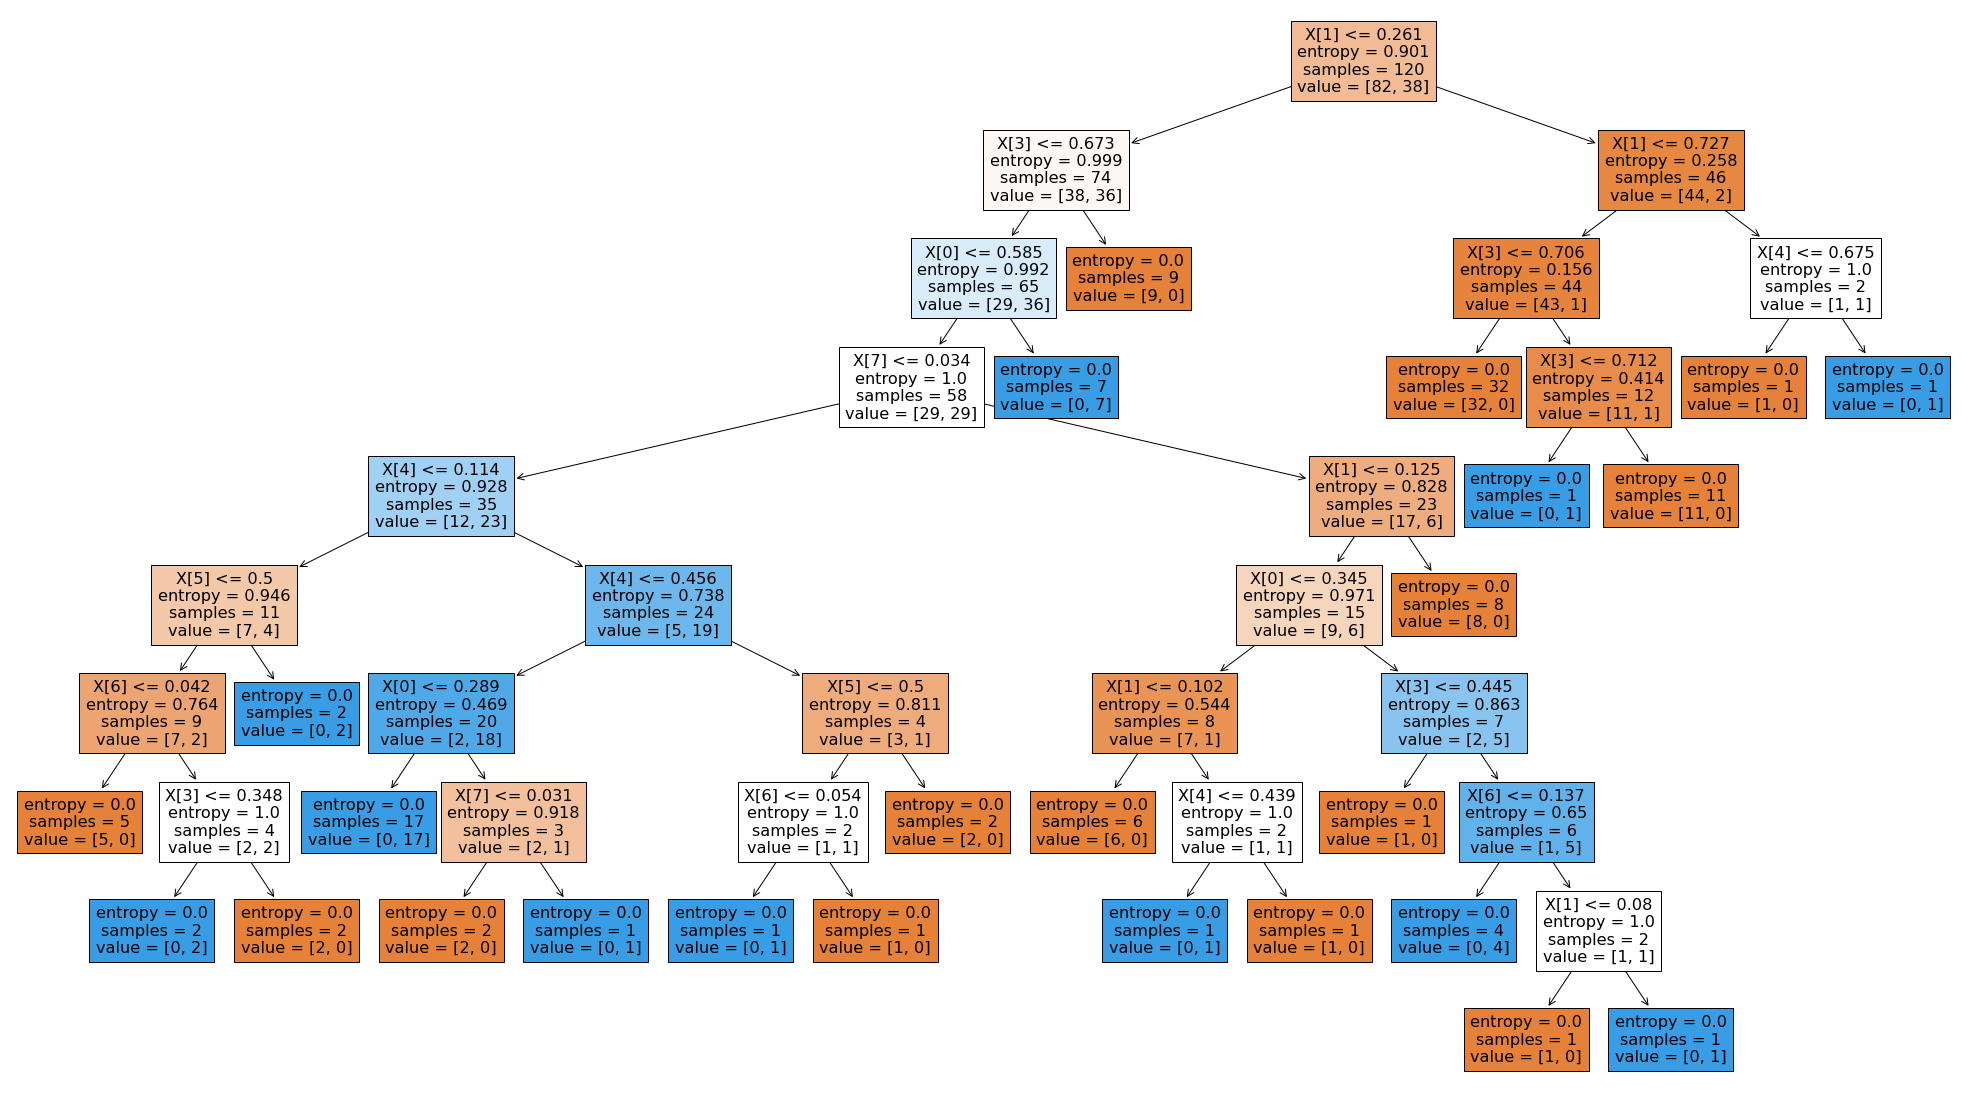

In [13]:
plt.figure(figsize = (35,20))
tree.plot_tree(obj, filled = True)

In [14]:
pred = obj.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(Y_test,pred)

0.5625

In [17]:
accuracy_score(Y_train,obj.predict(X_train))

1.0

# SVM

In [18]:
from sklearn import preprocessing

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, Y, test_size=0.4, random_state=4)

In [20]:
from sklearn import svm
from sklearn.metrics import confusion_matrix
clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train) 

SVC(kernel='linear')

In [21]:
pred = clf.predict(X_test)
pred[0:5]

array([0., 0., 0., 0., 0.])

In [22]:
cnf_matrix = confusion_matrix(y_test,pred)

print(cnf_matrix)

[[50  5]
 [15 10]]


In [23]:
(50+10)/(50+10+15+5)

0.75

In [24]:
accuracy_score(y_train,clf.predict(X_train))

0.8083333333333333

# Random Forest

In [25]:
from sklearn.ensemble import RandomForestClassifier

In [26]:
m = RandomForestClassifier(n_estimators=20)

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, Y, test_size=0.4, random_state=4)

In [28]:
m.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [29]:
m.score(X_test, y_test)

0.725

In [35]:
m.score(X_train, y_train)

1.0

# Ada Boost

In [30]:
from sklearn.ensemble import AdaBoostClassifier

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_new, Y, test_size=0.4, random_state=4)

In [32]:
n = AdaBoostClassifier(base_estimator=None, n_estimators=200)

In [33]:
n.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=200)

In [34]:
n.score(X_test, y_test)

0.675

In [36]:
m.score(X_train, y_train)

1.0